In [1]:
import sklearn
import shap
from sklearn.model_selection import train_test_split


In [6]:
# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[3,:])
# shap.plots.force(shap_values[0])

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
shap_values.shape

(30, 4, 3)

In [3]:
svm.predict_proba

<bound method BaseSVC.predict_proba of SVC(probability=True)>

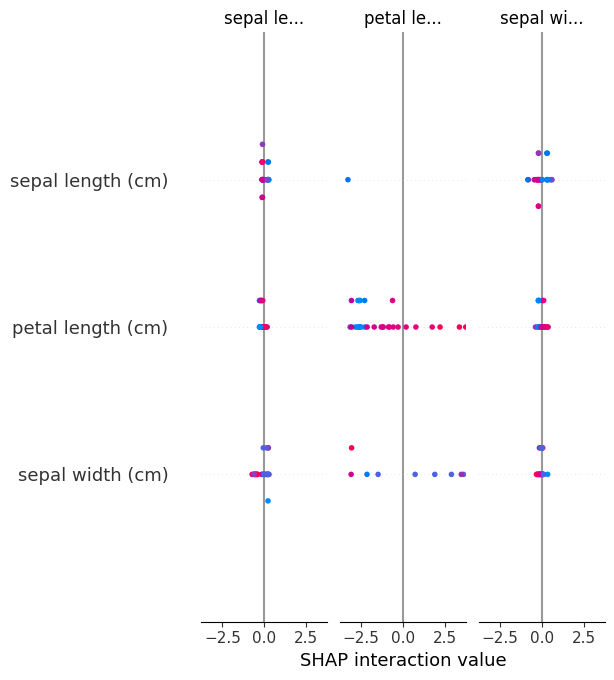

In [4]:
shap.summary_plot(shap_values, X_test)

In [5]:
X_test

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
100                6.3               3.3                6.0               2.5
40                 5.0               3.5                1.3               0.3
86                 6.7               3.1                4.7               1.5
76                 6.8               2.8                4.8               1.4
71                 6.1               2.8                4.0               1.3
134                6.1               2.6                5.6               1.4
51                 6.4               3.2                4.5               1.5
73                 6.1               2.8                4.7               1.2
54                 6.5               2.8                4.6               1.5
63                 6.1               2.9                4.7               1.4
37                 4.9               3.6                1.4               0.1
78                 6.0               2.9                4.5               1.5
90                 5.5               2.6                4.4               1.2
45                 4.8               3.0                1.4               0.3
16                 5.4               3.9                1.3               0.4
121                5.6               2.8                4.9               2.0
66                 5.6               3.0                4.5               1.5
24                 4.8               3.4                1.9               0.2
8                  4.4               2.9                1.4               0.2
126                6.2               2.8                4.8               1.8
22                 4.6               3.6                1.0               0.2
44                 5.1               3.8                1.9               0.4
97                 6.2               2.9                4.3               1.3
93                 5.0               2.3                3.3               1.0
26                 5.0               3.4                1.6               0.4